In [1]:
%run '/home/gvolta/Desktop/Function/Useful/Def.ipynb'

Initialization done, Notebook was last run on: 09/05/2019


In [2]:
import lax 
from lax.lichens import sciencerun1
from lax.lichens import sciencerun0

from pax import units, configuration
pax_config = configuration.load_configuration('XENON1T')['DEFAULT']
tpc_height = pax_config['tpc_length']
tpc_radius = pax_config['tpc_radius']

import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         main_data_paths= ['/dali/lgrandi/xenon1t/processed/pax_v6.10.1'], 
         minitree_paths = ['/dali/lgrandi/giovo/minitrees/pax_v6.10.1',
                           '/dali/lgrandi/xenon1t/minitrees/pax_v6.10.1'],
         make_minitrees = False)

%matplotlib inline

# Reading of data

In [3]:
path = '/dali/lgrandi/giovo/minitrees/pax_v6.10.1/'
dataNG1 = pd.read_pickle(path+'SR2_NG1_maps_z10_pax6.10.1.pkl')
dataNG2 = pd.read_pickle(path+'SR2_NG2_maps_z10_pax6.10.1.pkl')
dataNG3 = pd.read_pickle(path+'SR2_NG3_maps_z10_pax6.10.1.pkl')
dataNG4 = pd.read_pickle(path+'SR2_NG4_maps_z10_pax6.10.1.pkl')

In [4]:
print('Data NG1: ')
for i in range(len(dataNG1.run_number)-1):
    if dataNG1['run_number'].iloc[i] != dataNG1['run_number'].iloc[i+1]: 
        print(dataNG1['run_number'].iloc[i])
print('################################################')
print('Data NG2: ')
for i in range(len(dataNG2.run_number)-1):
    if dataNG2['run_number'].iloc[i] != dataNG2['run_number'].iloc[i+1]:
        print(dataNG2['run_number'].iloc[i])
('################################################')
print('Data NG3: ')
for i in range(len(dataNG3.run_number)-1):
    if dataNG3['run_number'].iloc[i] != dataNG3['run_number'].iloc[i+1]:
        print(dataNG3['run_number'].iloc[i])
('################################################')
print('Data NG4: ')
for i in range(len(dataNG4.run_number)-1):
    if dataNG4['run_number'].iloc[i] != dataNG4['run_number'].iloc[i+1]:
        print(dataNG4['run_number'].iloc[i])        

Data NG1: 
17511
17512
17513
17514
17515
17516
17517
17518
17519
17520
17521
17522
17523
17524
17525
17526
17527
17528
17529
17530
17531
17532
17533
17534
17535
17536
17537
17538
17539
17540
17541
17542
17544
17546
17547
17548
17549
17550
17551
17553
17554
17555
17556
17557
17558
17559
17562
17564
17565
17566
17567
17568
17569
17570
17571
17572
17573
17574
17575
17576
17577
17578
17579
17791
17793
17794
17798
17799
17800
17801
17802
17803
17804
17805
17806
17807
17808
17809
17810
17811
17812
17813
17814
17815
17816
17817
17818
17819
17820
17821
17822
17823
17824
################################################
Data NG2: 
17826
17827
17828
17829
17830
17831
17832
17833
17834
17835
17836
17837
17838
17839
17840
17841
17842
17843
17844
17845
17846
17847
17848
17849
17850
17851
17852
17853
17867
17868
17869
17870
17871
17872
17873
17874
17875
17876
17877
17878
17879
17880
17881
17882
17883
17885
17886
17887
17888
17889
17891
17892
17893
17894
17895
17896
17897
17898
17899
17900
17901
17902

In [4]:
Data = [dataNG1, dataNG2]
dataNG_pre18836 = pd.concat(Data, ignore_index=True)

In [6]:
print('Data pre18836: ')
for i in range(len(dataNG_pre18836.run_number)-1):
    if dataNG_pre18836['run_number'].iloc[i] != dataNG_pre18836['run_number'].iloc[i+1]:
        print(dataNG_pre18836['run_number'].iloc[i], ', ')     

Data pre18836: 
17511 , 
17512 , 
17513 , 
17514 , 
17515 , 
17516 , 
17517 , 
17518 , 
17519 , 
17520 , 
17521 , 
17522 , 
17523 , 
17524 , 
17525 , 
17526 , 
17527 , 
17528 , 
17529 , 
17530 , 
17531 , 
17532 , 
17533 , 
17534 , 
17535 , 
17536 , 
17537 , 
17538 , 
17539 , 
17540 , 
17541 , 
17542 , 
17544 , 
17546 , 
17547 , 
17548 , 
17549 , 
17550 , 
17551 , 
17553 , 
17554 , 
17555 , 
17556 , 
17557 , 
17558 , 
17559 , 
17562 , 
17564 , 
17565 , 
17566 , 
17567 , 
17568 , 
17569 , 
17570 , 
17571 , 
17572 , 
17573 , 
17574 , 
17575 , 
17576 , 
17577 , 
17578 , 
17579 , 
17791 , 
17793 , 
17794 , 
17798 , 
17799 , 
17800 , 
17801 , 
17802 , 
17803 , 
17804 , 
17805 , 
17806 , 
17807 , 
17808 , 
17809 , 
17810 , 
17811 , 
17812 , 
17813 , 
17814 , 
17815 , 
17816 , 
17817 , 
17818 , 
17819 , 
17820 , 
17821 , 
17822 , 
17823 , 
17824 , 
17825 , 
17826 , 
17827 , 
17828 , 
17829 , 
17830 , 
17831 , 
17832 , 
17833 , 
17834 , 
17835 , 
17836 , 
17837 , 
17838 , 
17839 , 
17840 , 
178

In [6]:
for i in range(len(dataNG_pre18836.columns)): print(dataNG_pre18836.columns[i])

alt_s1_interaction_drift_time
alt_s1_interaction_z
alt_s2_interaction_s2_range_50p_area
alt_s2_interaction_s2_range_80p_area
alt_s2_interaction_x
alt_s2_interaction_y
alt_s2_interaction_z
cs1
cs1_nn
cs1_nn_tf
cs1_no_field_corr_nn
cs1_no_field_corr_nn_tf
cs1_no_field_corr_tpf
cs1_tpf
cs2
cs2_bottom
cs2_bottom_nn
cs2_bottom_nn_tf
cs2_bottom_tpf
cs2_nn
cs2_nn_tf
cs2_top
cs2_top_nn
cs2_top_nn_tf
cs2_top_tpf
cs2_tpf
drift_time
event_duration
event_number
event_time
flashing_PMT
flashing_time
flashing_width
inside_flash
largest_coincidence
largest_other_s1
largest_other_s2
largest_other_s2_delay_main_s1
largest_other_s2_delay_main_s2
largest_other_s2_pattern_fit
largest_s2_before_main_s2_area
largest_unknown
largest_veto
nearest_1e5pe_event
nearest_1e6pe_event
nearest_3e5pe_event
nearest_busy
nearest_busy_off
nearest_busy_on
nearest_event
nearest_flash
nearest_hev
nearest_hev_off
nearest_hev_on
nearest_muon_veto_trigger
nearest_s2_area
next_1e5pe_event
next_1e6pe_event
next_3e5pe_event
next_

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


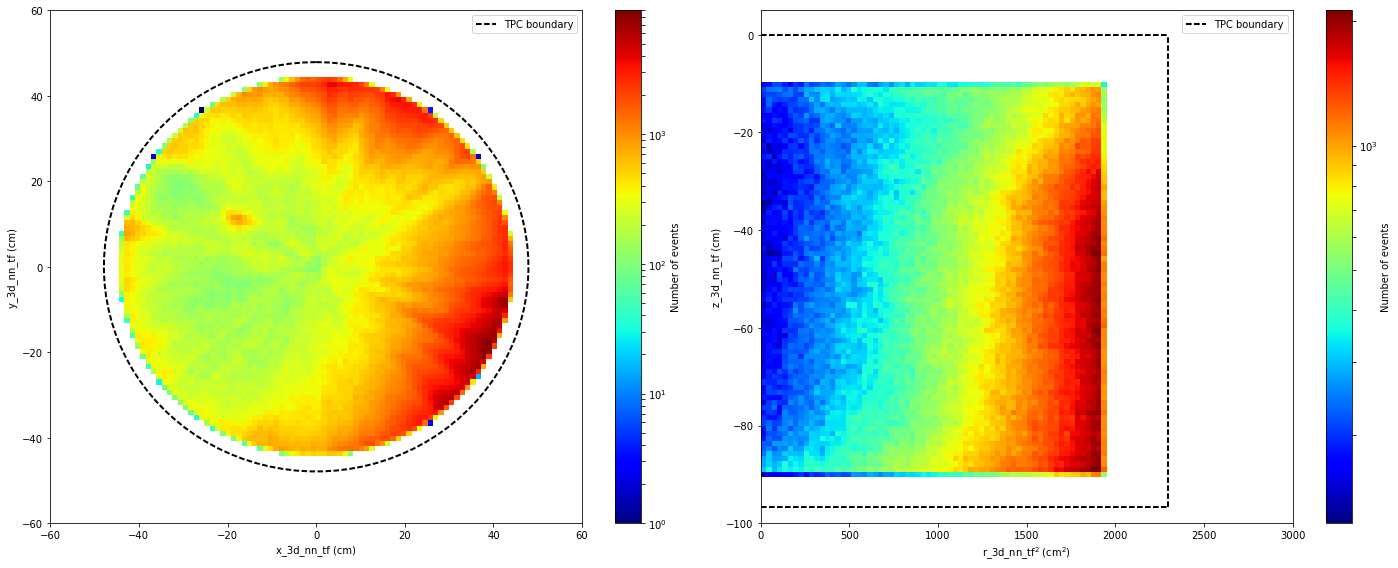

In [7]:
data_distribution(dataNG_pre18836, 'x_3d_nn_tf', 'y_3d_nn_tf', 'z_3d_nn_tf', 'r_3d_nn_tf', bins=[100,100])

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


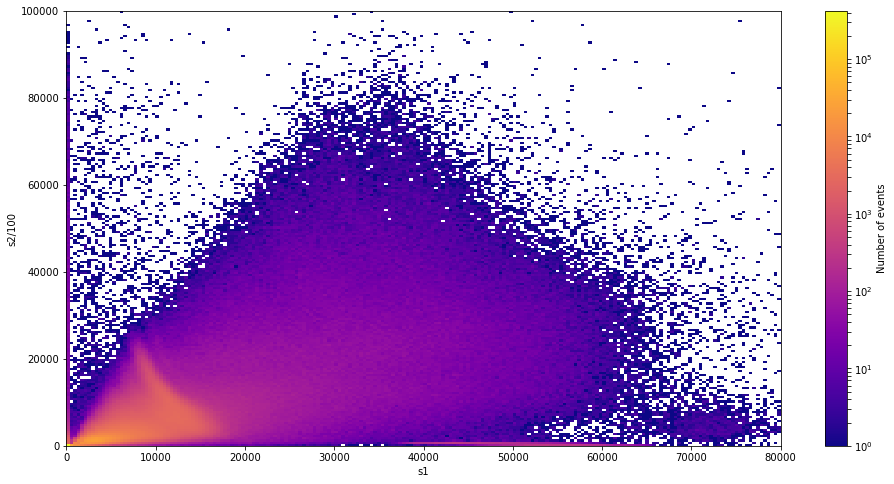

In [8]:
fig = plt.figure(1, figsize=(16,8))
#plt.subplot(121)
plt.hist2d(dataNG_pre18836['s1'], 
           dataNG_pre18836['s2']/100,
           bins=(200,200), 
           range=((0, 8e4), (0,1e5)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s1')
plt.ylabel('s2/100')

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


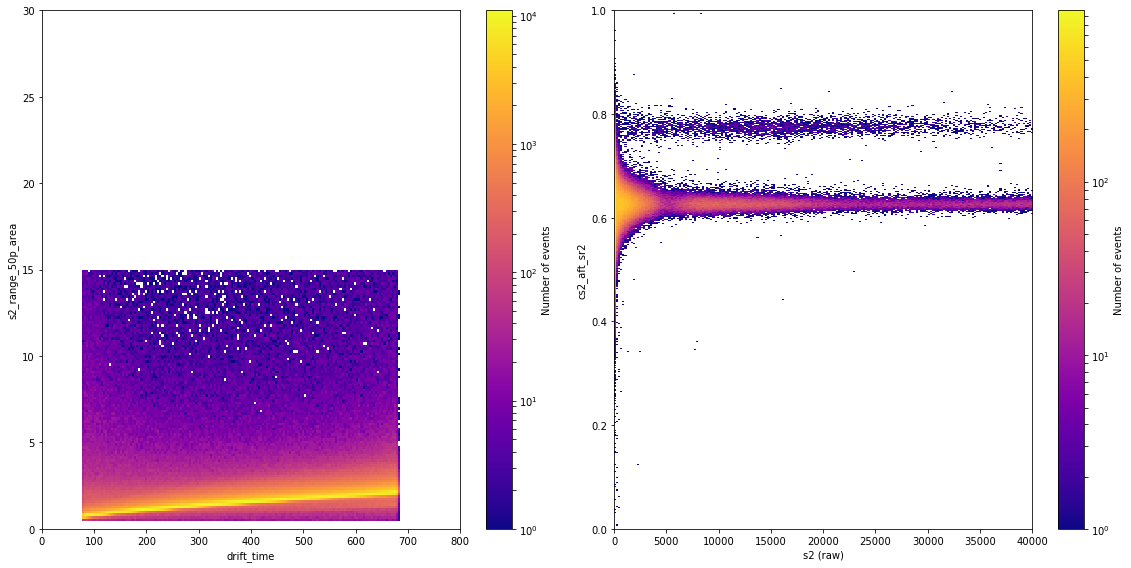

In [9]:
fig = plt.figure(2, figsize=(16,8))
plt.subplot(121)
plt.hist2d(dataNG_pre18836['drift_time']/1000, 
           dataNG_pre18836['s2_range_50p_area']/1000,
           bins=(200,200), 
           range=((0, 800), (0,30)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('drift_time')
plt.ylabel('s2_range_50p_area')

plt.subplot(122)
plt.hist2d(dataNG_pre18836['s2'], 
           dataNG_pre18836['cs2_aft_sr2'],
           bins=(200,1000), 
           range=((0, 4e4), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2 (raw)')
plt.ylabel('cs2_aft_sr2')

plt.tight_layout()

In [10]:
dataNG_pre18836['Cut_s2_range_50p_area'] = (dataNG_pre18836['s2_range_50p_area'] < 15e3) & \
                                             (dataNG_pre18836['s2_range_50p_area'] > 500)
dataNG_pre18836 = hax.cuts.selection(dataNG_pre18836, dataNG_pre18836['Cut_s2_range_50p_area'] == True)

Unnamed selection: 0 rows removed (100.00% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


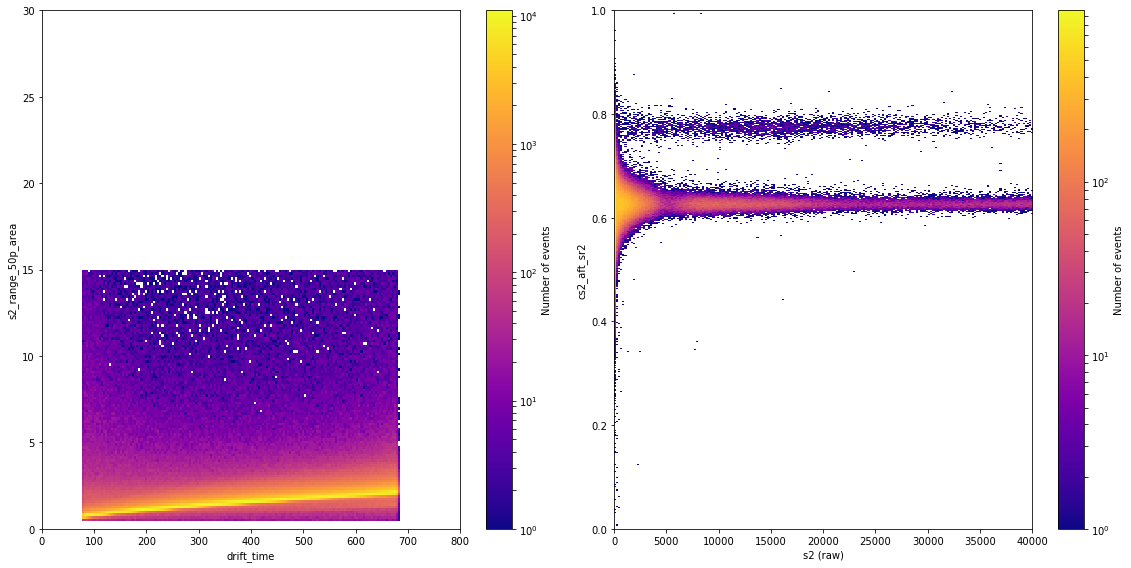

In [11]:
fig = plt.figure(2, figsize=(16,8))
plt.subplot(121)
plt.hist2d(dataNG_pre18836['drift_time']/1000, 
           dataNG_pre18836['s2_range_50p_area']/1000,
           bins=(200,200), 
           range=((0, 800), (0,30)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('drift_time')
plt.ylabel('s2_range_50p_area')

plt.subplot(122)
plt.hist2d(dataNG_pre18836['s2'], 
           dataNG_pre18836['cs2_aft_sr2'],
           bins=(200,1000), 
           range=((0, 4e4), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2 (raw)')
plt.ylabel('cs2_aft_sr2')

plt.tight_layout()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


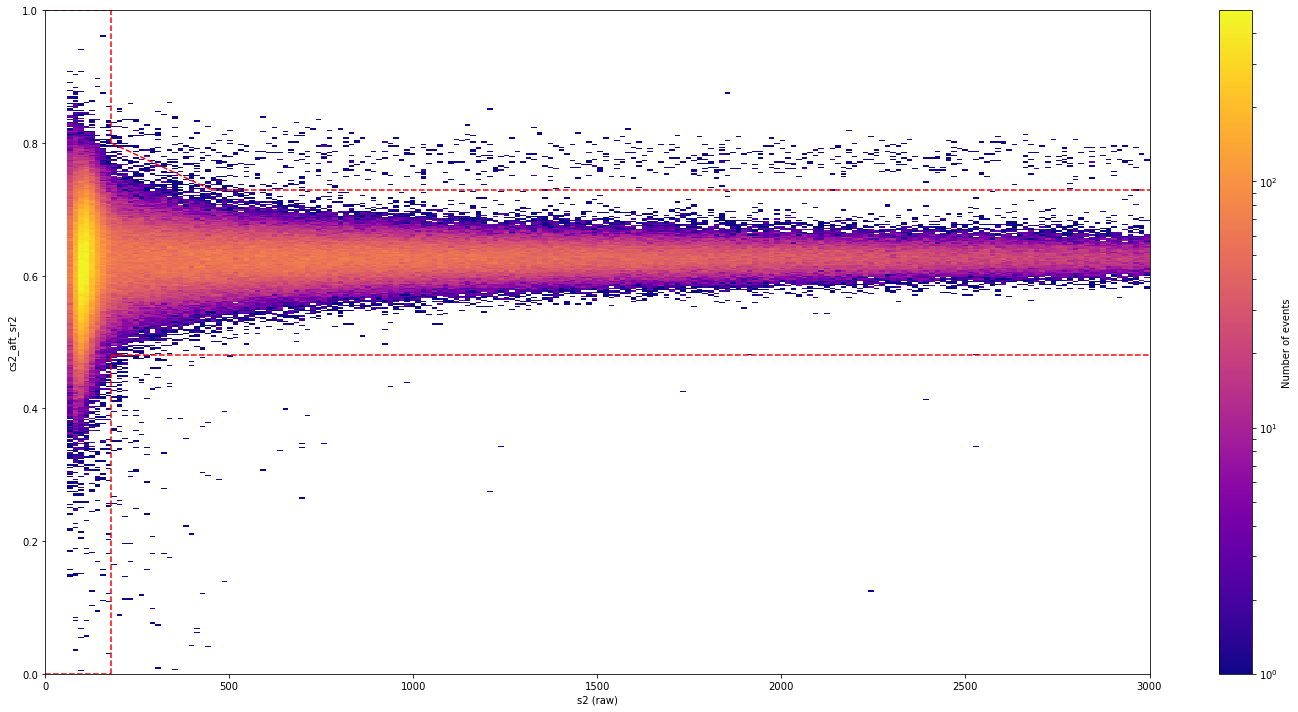

In [20]:
fig = plt.figure(figsize=(20,10))
x = np.linspace(180,450,50)
y = -2.59*pow(10,-4)*x+0.84665

plt.hist2d(dataNG_pre18836['s2'], 
           dataNG_pre18836['cs2_aft_sr2'],
           bins=(200,500), 
           range=((0, 3e3), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2 (raw)')
plt.ylabel('cs2_aft_sr2')
#plt.title('Maps')

plt.hlines(y=0.73, xmin=450, xmax=3e3, linestyle = '--', colors='red')
plt.plot(x, y, '--r')
plt.vlines(x=180, ymin=0.8, ymax=1, linestyle = '--', colors='red')
plt.hlines(y=1, xmin=0, xmax=180, linestyle = '--', colors='red')

plt.hlines(y=0.48, xmin=180, xmax=3e3, linestyle = '--', colors='red')
plt.vlines(x=180, ymin=0, ymax=0.48, linestyle = '--', colors='red')
plt.hlines(y=0.0, xmin=0, xmax=180, linestyle = '--', colors='red')

plt.tight_layout()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


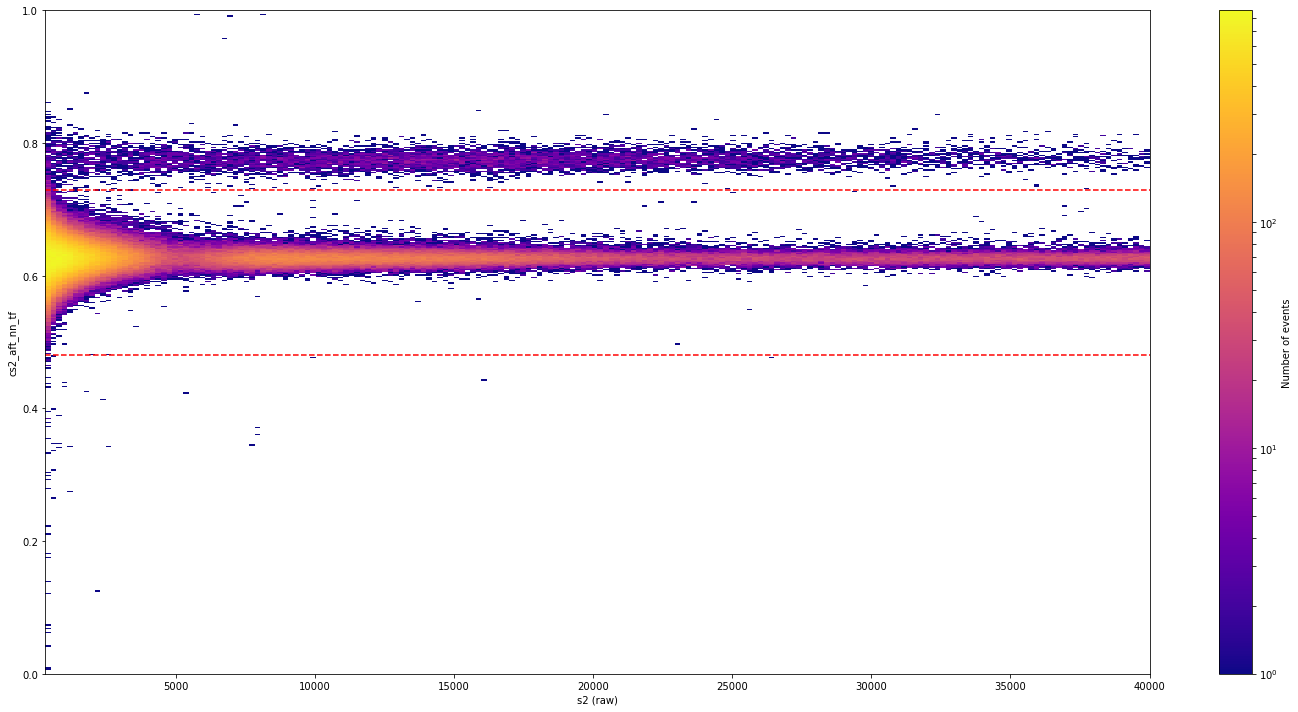

In [18]:
fig = plt.figure(2, figsize=(20,10))
plt.hist2d(dataNG_pre18836['s2'], 
           dataNG_pre18836['cs2_aft_sr2'],
           bins=(200,500), 
           range=((3e2, 4e4), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2 (raw)')
plt.ylabel('cs2_aft_nn_tf')
#plt.title('Maps')

plt.hlines(y=0.73, xmin=0, xmax=4e4, linestyle = '--', colors='red')
plt.hlines(y=0.48, xmin=0, xmax=4e4, linestyle = '--', colors='red')
plt.tight_layout()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


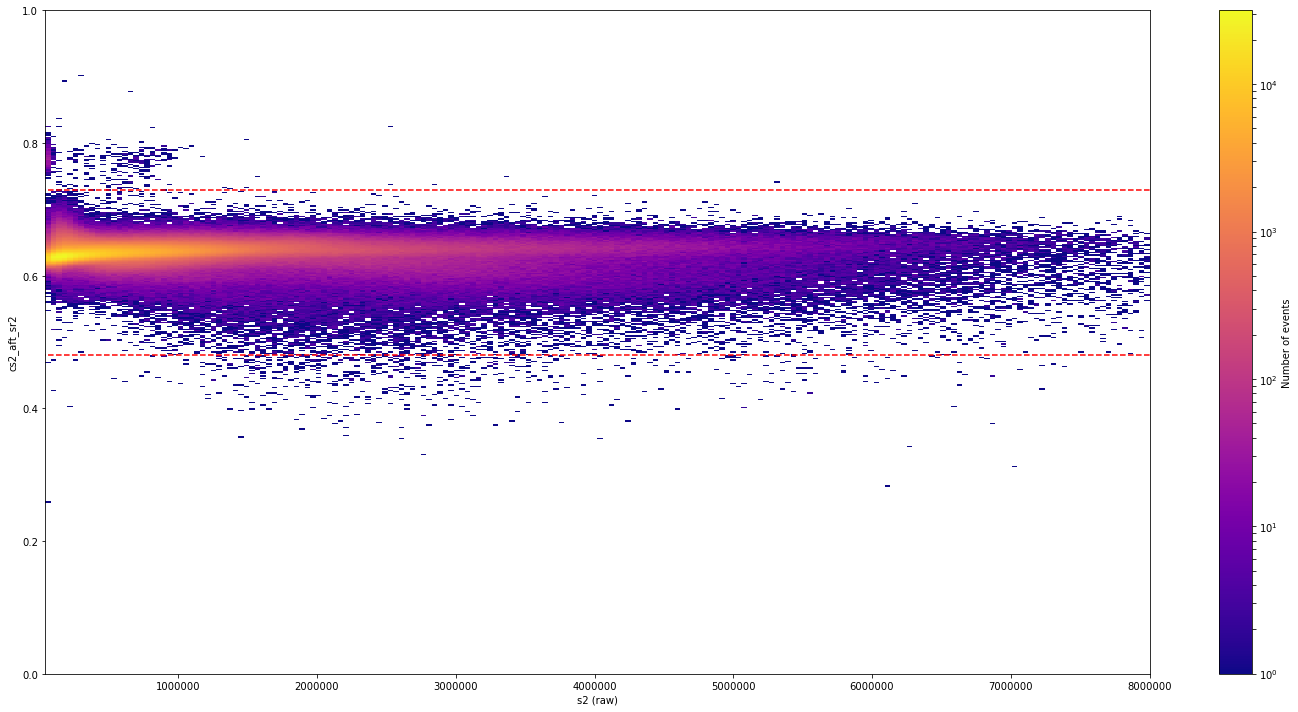

In [21]:
fig = plt.figure(2, figsize=(20,10))

plt.hist2d(dataNG_pre18836['s2'], 
           dataNG_pre18836['cs2_aft_sr2'],
           bins=(200,500), 
           range=((4e4, 8e6), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2 (raw)')
plt.ylabel('cs2_aft_sr2')
#plt.title('Maps')

plt.hlines(y=0.73, xmin=0, xmax=8e6, linestyle = '--', colors='red')
plt.hlines(y=0.48, xmin=0, xmax=8e6, linestyle = '--', colors='red')

plt.tight_layout()

# Avoiding bias

In [21]:
dataNG_pre18836['Cut_bias_sr2'] = (dataNG_pre18836['s2']<180) | \
                                  (((dataNG_pre18836['s2']>=180) & (dataNG_pre18836['s2']<=450)) & \
                                   ((dataNG_pre18836['cs2_aft_sr2'] < (-2.59*pow(10,-4)*dataNG_pre18836['s2']+0.84665)) & \
                                   (dataNG_pre18836['cs2_aft_sr2'] > 0.48))) | \
                                  ((dataNG_pre18836['s2']> 450) & ((dataNG_pre18836['cs2_aft_sr2'] < 0.73) & \
                                   (dataNG_pre18836['cs2_aft_sr2'] > 0.48)))

In [22]:
dataNG_pre18836_waveform = dataNG_pre18836.copy()
dataNG_pre18836_waveform = hax.cuts.selection(dataNG_pre18836_waveform, dataNG_pre18836_waveform['Cut_bias_sr2'] == False)

Unnamed selection: 3271322 rows removed (0.31% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [23]:
dataNG_pre18836_cut = dataNG_pre18836.copy()
dataNG_pre18836_cut = hax.cuts.selection(dataNG_pre18836_cut, dataNG_pre18836_cut['Cut_bias_sr2'] == True)

Unnamed selection: 10113 rows removed (99.69% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


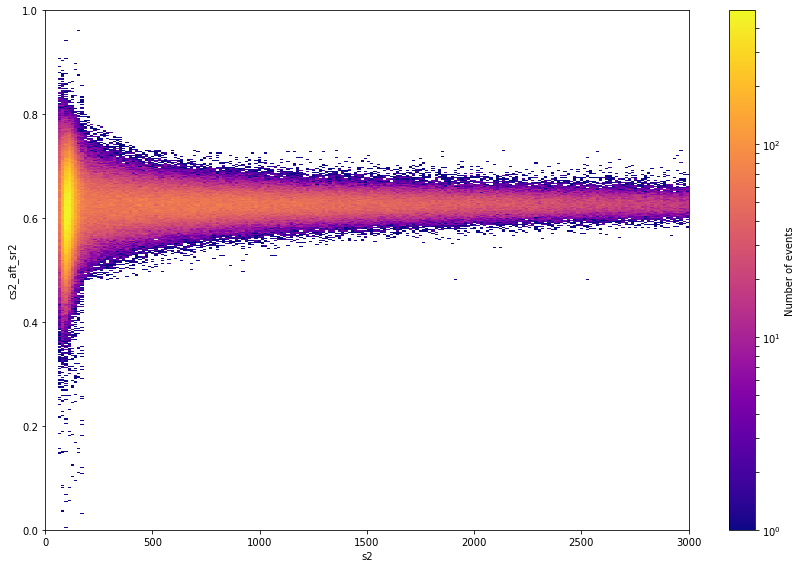

In [24]:
fig = plt.figure(figsize=(12,8))
plt.hist2d(dataNG_pre18836_cut['s2'], 
           dataNG_pre18836_cut['cs2_aft_sr2'],
           bins=(200,500), 
           range=((0, 3e3), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2')
plt.ylabel('cs2_aft_sr2')
plt.tight_layout()

dataNG_pre18836_cut.to_pickle('/dali/lgrandi/giovo/minitrees/pax_v6.10.1/SR2_dataNG_pre18836_after_selection_cs2_aft_sr2_pax6.10.1.pkl')

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


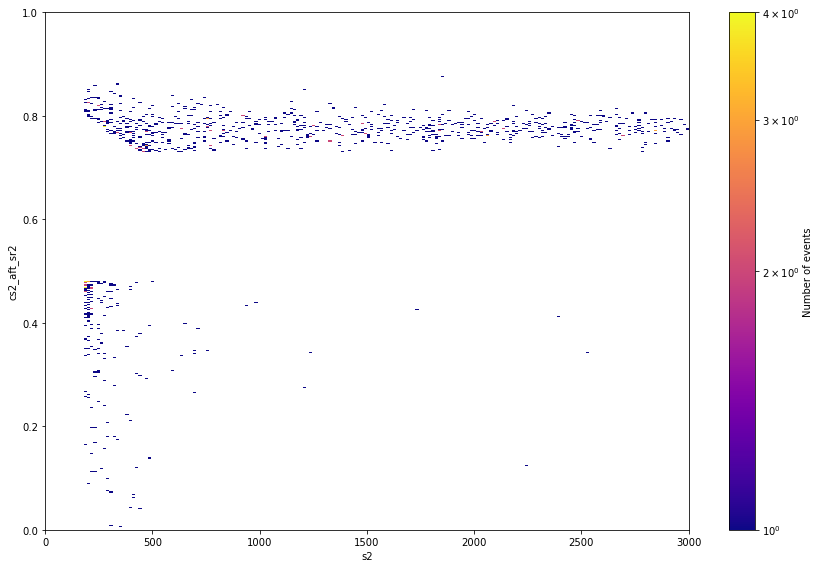

In [25]:
fig = plt.figure(figsize=(12,8))
plt.hist2d(dataNG_pre18836_waveform['s2'], 
           dataNG_pre18836_waveform['cs2_aft_sr2'],
           bins=(200,500), 
           range=((0, 3e3), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2')
plt.ylabel('cs2_aft_sr2')
plt.tight_layout()

In [50]:
dataNG_pre18836_waveform = dataNG_pre18836_waveform[dataNG_pre18836_waveform['cs2_aft_sr2']>0.6]

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


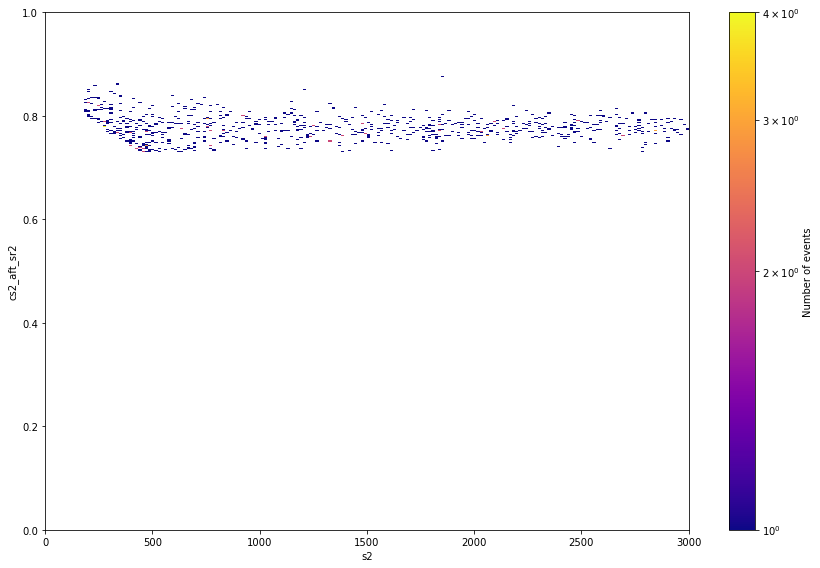

In [54]:
fig = plt.figure(figsize=(12,8))
plt.hist2d(dataNG_pre18836_waveform['s2'], 
           dataNG_pre18836_waveform['cs2_aft_sr2'],
           bins=(200,500), 
           range=((0, 3e3), (0.0,1.0)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2')
plt.ylabel('cs2_aft_sr2')
plt.tight_layout()

In [53]:
dataNG_pre18836_waveform[['event_number', 'run_number']]

,event_number,run_number
369,1472,17511
509,1955,17511
1167,4543,17511
1769,6808,17511
2271,8832,17511
2498,9670,17511
2659,10245,17511
3501,13449,17511
4029,15445,17511
4149,15988,17511


In [49]:
pd.to_datetime(dataNG_pre18836_waveform.event_time)

369       2018-03-12 15:13:56.203948670
509       2018-03-12 15:14:16.176919640
1167      2018-03-12 15:15:57.753960490
1769      2018-03-12 15:17:30.201954750
2271      2018-03-12 15:18:47.735548970
2498      2018-03-12 15:19:19.580526790
2659      2018-03-12 15:19:40.877615700
3501      2018-03-12 15:21:43.037902370
4029      2018-03-12 15:22:56.878219930
4149      2018-03-12 15:23:17.213169420
4403      2018-03-12 15:23:53.345902310
4759      2018-03-12 15:24:44.531319960
4785      2018-03-12 15:24:48.283865260
4885      2018-03-12 15:25:02.652028490
5959      2018-03-12 15:27:40.496275840
6062      2018-03-12 15:27:56.775286360
6479      2018-03-12 15:28:56.776563240
7076      2018-03-12 15:30:25.530975580
7771      2018-03-12 15:32:14.390710130
8021      2018-03-12 15:32:54.072954160
8135      2018-03-12 15:33:10.067671960
8253      2018-03-12 15:33:26.670381770
8868      2018-03-12 15:35:02.085907670
9075      2018-03-12 15:35:34.597004340
9578      2018-03-12 15:36:50.341189590
